In [1]:
# See https://github.com/CINPLA/pyopenephys

import pyopenephys
from utils.custom_functions import getFirstPulses, alignTrace, normalizeTrace, parseTitlesForDates, timeDifferences
import matplotlib.pylab as plt
import numpy as np
import math
import sys
import os
sys.path.append("../") # go to parent 
from BehaviouralAnalysis.utils.plot_utils import axvlines
import quantities as pq

In [2]:
GeneralDataDir = '/mnt/c/Users/herny/Desktop/SWC/Data/Ephys_data/Laser_Test/'
Experiment = 'M640313_2019-03-29_10-18-03_PhotoDiode_5mW_1ms_e3s'

file = pyopenephys.File(GeneralDataDir + Experiment)

Loading Open-Ephys: reading settings.xml...
Decoding data from  binary  format


In [3]:
# all experiments
experiments = file.experiments
print(len(experiments))

1


In [4]:
# recordings of first experiment
experiment1 = experiments[0]
recordings = experiment1.recordings
print(len(experiments))

1


In [5]:
# access first recording
recording = recordings[0]

In [6]:
print('Duration: ', recording.duration)
print('Sampling Rate: ', recording.sample_rate)

.dat:  continuous.dat
Estimated samples:  6587904  Numchan:  43
Duration:  219.59676666666667 1/Hz
Sampling Rate:  30000.0 Hz


In [50]:
analog_signals = recording.analog_signals
signals = analog_signals[0]

events_data = recording.events
events = events_data[0]
# spiketrains = recording.spiketrains
# tracking_data are accessible only using binary format
# tracking_data = recording.tracking

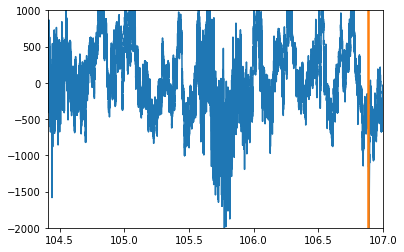

In [51]:
# plot analog signal of channel 4
fig_an, ax_an = plt.subplots()
ax_an.plot(signals.times, signals.signal[3])
axvlines(events.times)
plt.xlim(104.41, 107)
plt.ylim(-2000, 1000)
plt.show()

In [52]:
# make a function to get the first events of the pulses
# put a condition to pick those where the preceiding pulse was a least X seconds
firstpulses  = getFirstPulses(events.times, 0.5)

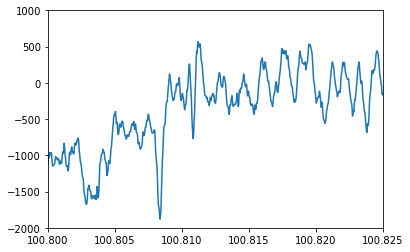

In [53]:
fig_an, ax_an = plt.subplots()
ax_an.plot(signals.times, signals.signal[3])
axvlines(events.times)
axvlines(firstpulses)
plt.xlim(100.8, 100.825)
plt.ylim(-2000, 1000)
plt.show()

In [54]:
# function to align to the first pulses
intervalWindow = [-0.05,0.075]
traces_aligned = alignTrace(signals.signal, signals.times, firstpulses, intervalWindow, recording.sample_rate)

In [55]:
traces_aligned

[array([[ -269.,  -325.,  -328., ...,   367.,   410.,   394.],
        [  702.,   713.,   716., ...,  -369.,  -340.,  -352.],
        [ -339.,  -319.,  -319., ...,   214.,   177.,   160.],
        ..., 
        [ 1136.,  1146.,  1083., ..., -1338., -1359., -1252.],
        [ -547.,  -455.,  -471., ...,  1078.,  1097.,  1044.],
        [  -35.,   -91.,  -127., ..., -1068., -1124., -1188.]]),
 array([[ -339.,  -401.,  -358., ...,   336.,   388.,   346.],
        [  829.,   862.,   915., ...,  -318.,  -278.,  -264.],
        [ -433.,  -432.,  -444., ...,    34.,    14.,    55.],
        ..., 
        [ 1259.,  1238.,  1238., ..., -1567., -1515., -1480.],
        [ -558.,  -463.,  -408., ...,  1346.,  1362.,  1319.],
        [ -159.,  -149.,  -202., ..., -1193., -1210., -1199.]]),
 array([[ -269.,  -267.,  -215., ...,   304.,   340.,   360.],
        [  738.,   771.,   815., ...,  -313.,  -324.,  -416.],
        [ -279.,  -280.,  -373., ...,   210.,   213.,   157.],
        ..., 
        [

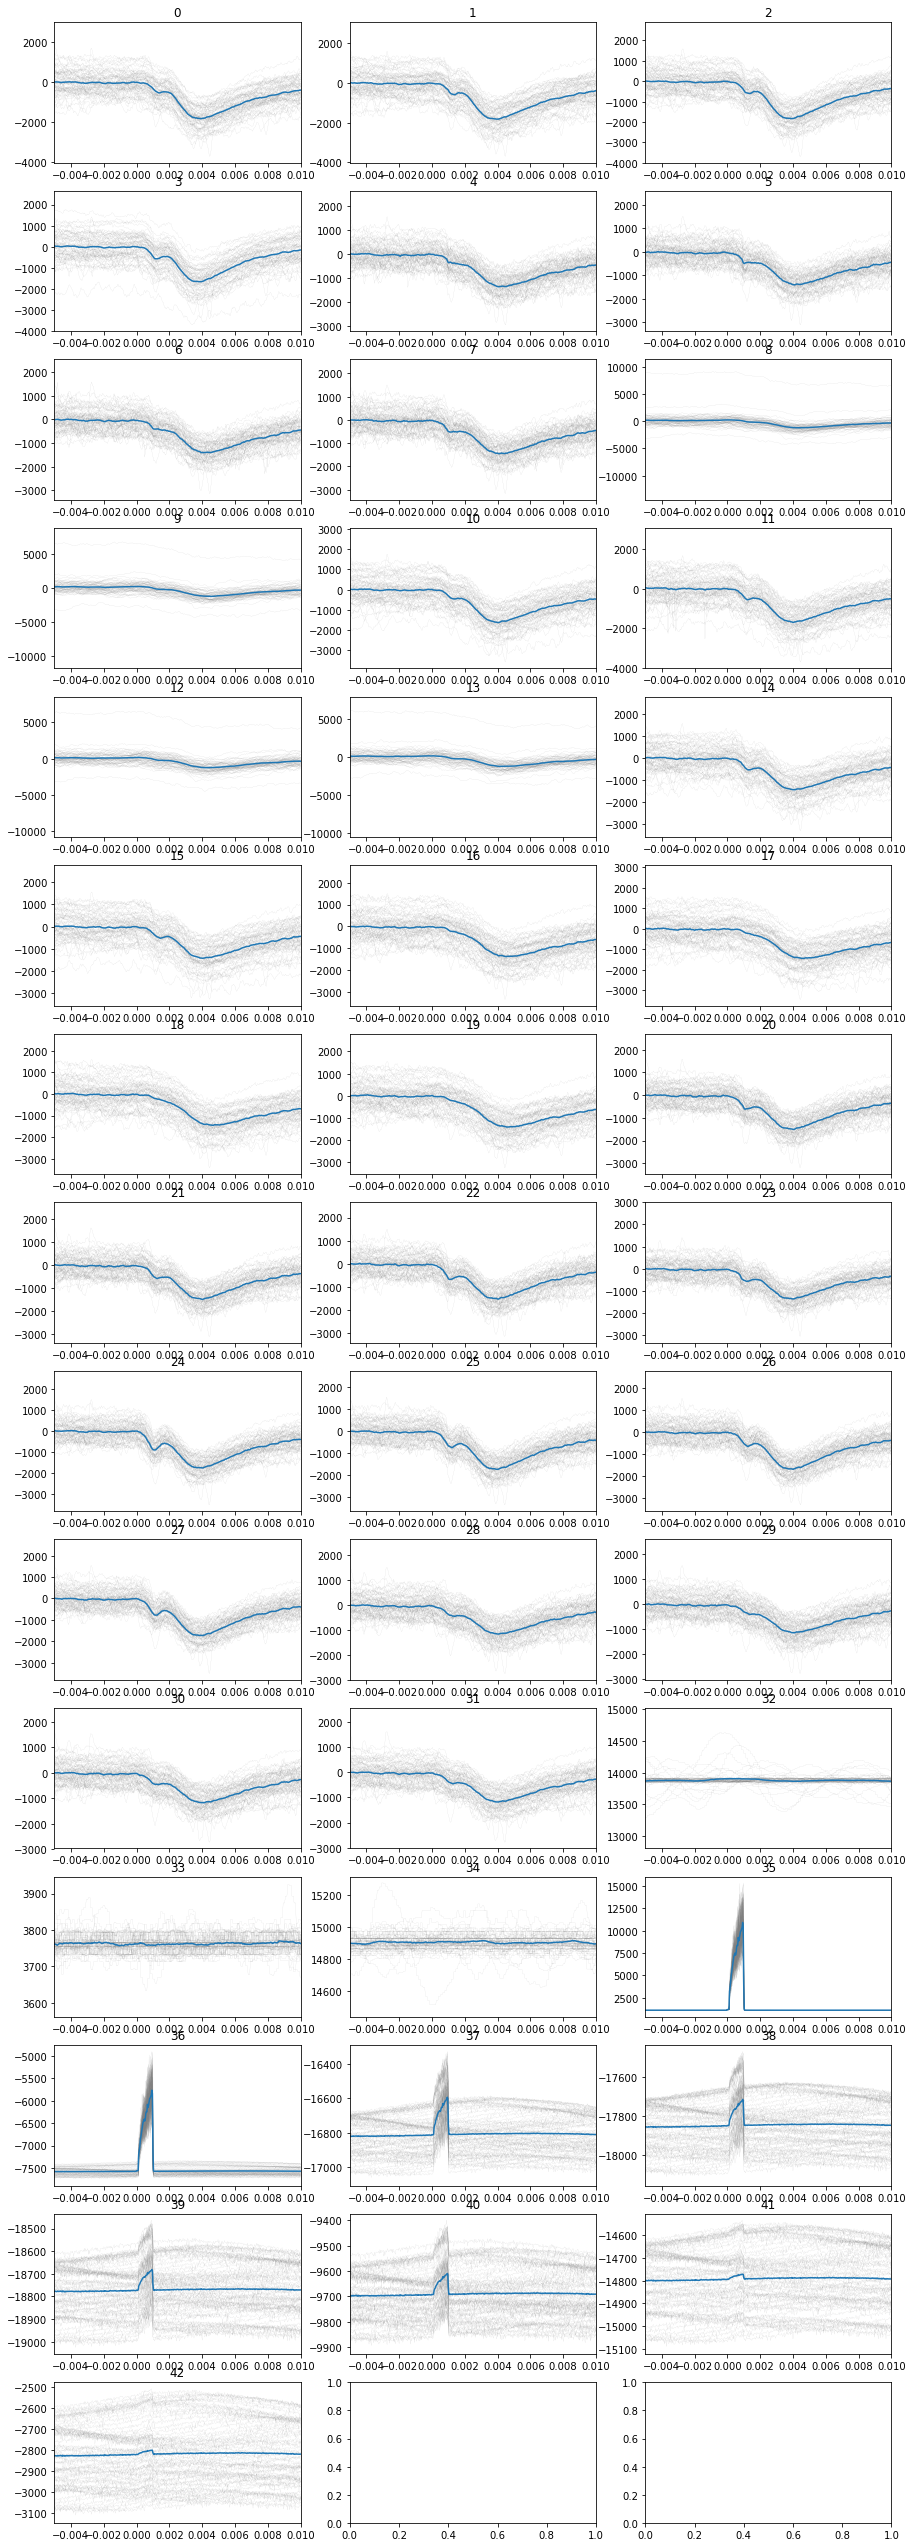

In [56]:
intervalTimes = np.arange(intervalWindow[0], intervalWindow[1], 1/recording.sample_rate.base)

fig, axs = plt.subplots(math.ceil(len(traces_aligned)/3), 3, figsize=(15, 46), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for j in range(len(traces_aligned)):
    for i in range(traces_aligned[j].shape[0]):
        axs[j].plot(intervalTimes, traces_aligned[j][i,], color = 'grey', linewidth = 0.1, alpha = 0.6)
    #plot_utils.axvlines(events.times)
    #plot_utils.axvlines(firstpulses)
    avg = np.mean(traces_aligned[j], axis = 0)
    axs[j].plot(intervalTimes, avg)
    axs[j].set_xlim(-0.005, 0.01)
    axs[j].set_title(signals.channel_id[j])
plt.show()

['M640313_2019-01-15_16-35-38_LaserTest_30mW_1ms',
 'M640313_2019-01-15_16-42-55_LaserTest_30mW_2ms',
 'M640313_2019-01-15_17-02-18_LaserTest_30mW_3ms']

In [3]:
os.listdir(GeneralDataDir)

['000_Results',
 'M640313_2019-01-15_16-35-38_LaserTest_30mW_1ms',
 'M640313_2019-01-15_16-42-55_LaserTest_30mW_2ms',
 'M640313_2019-01-15_17-02-18_LaserTest_30mW_3ms',
 'M640313_2019-01-15_17-14-05_LaserTest_30mW_4ms',
 'M640313_2019-01-15_17-21-51_LaserTest_30mW_5ms',
 'M640313_2019-01-16_14-11-36_LaserTest_10mW_1ms',
 'M640313_2019-01-16_14-20-21_LaserTest_10mW_2ms',
 'M640313_2019-01-16_14-26-44_LaserTest_10mW_3ms',
 'M640313_2019-01-16_14-34-00_LaserTest_10mW_4ms',
 'M640313_2019-01-16_14-58-14_LaserTest_60mW_1ms',
 'M640313_2019-01-16_15-02-45_LaserTest_60mW_2ms',
 'M640313_2019-01-16_15-08-25_LaserTest_60mW_3ms',
 'M640313_2019-01-16_15-15-06_LaserTest_60mW_4ms',
 'M640313_2019-01-16_17-27-48_LaserTest_30mW_1ms',
 'M640313_2019-01-16_17-32-06_LaserTest_40mW_1ms',
 'M640313_2019-01-16_17-37-10_LaserTest_50mW_1ms',
 'M640313_2019-01-16_17-41-44_LaserTest_60mW_1ms',
 'M640313_2019-01-16_17-46-45_LaserTest_70mW_1ms',
 'M640313_2019-01-17_10-07-53_LaserTest_60mW_1ms',
 'M640313_2019-

In [7]:
# Analyze several experiments together

# Load the data into a list
# get the list of main directories:
ExpList = os.listdir(GeneralDataDir)
# clean (first element not needed in this case)
#del ExpList[0]

# Alternatively get the ones you are interested in

ExpList = ['M640313_2019-03-29_10-22-59_PhotoDiode_5mW_1ms_e3s']

'''
ExpList = ['M640313_2018-11-28_14-32-09_PW_55',
         'M640313_2018-11-29_18-43-57_Day3_pw55',
         'M640313_2018-11-30_15-14-08_Day4_pw55_2',
         'M640313_2018-12-01_16-39-57_Day5_pw55',
         'M640313_2018-12-02_16-55-01_Day6_pw55',
         #'M640313_2018-12-03_16-09-30_Day7_pw55_preTraining',
         'M640313_2018-12-04_10-27-25_Day8_pw55_preTraining',
         'M640313_2018-12-04_13-31-59_Day8_pw55_postTraining',
         'M640313_2018-12-05_11-36-41_Day9_pw55_preTraining',
         'M640313_2018-12-05_14-31-47_Day9_pw55_postTraining',
         'M640313_2018-12-06_15-53-49_Day10_pw55_preTraining',
         'M640313_2018-12-06_16-54-38_Day10_pw55_postTraining',
         'M640313_2018-12-07_15-57-22_Day11_pw55_preTraining',
         'M640313_2018-12-07_17-13-17_Day11_pw55_postTraining']



ExpList= ['M640313_2018-11-29_18-55-04_Day3_pw44',
 'M640313_2018-11-30_14-16-32_Day4_pw44',
 'M640313_2018-11-30_14-58-03_Day4_pw44_2',
 'M640313_2018-12-01_16-56-40_Day5_pw44',
 'M640313_2018-12-02_17-09-54_Day6_pw44']
'''

'''
ExpList = ['M640313_2018-11-28_14-23-42_PW_66',
        'M640313_2018-11-28_14-32-09_PW_55',
        #'M640313_2018-11-28_14-36-09_PW_44',
        'M640313_2018-11-28_14-38-31_PW_77',
        #'M640313_2018-11-28_14-46-59_PW_88',
        'M640313_2018-11-28_14-52-59_PW_66_end']
'''


# Load them into a list
SignalsList = [None] * len(ExpList)
EventsList = [None] * len(ExpList)
SampleRateList = [None] * len(ExpList)
DurationList = [None] * len(ExpList)
i = 0
for exp in ExpList:
    #get to the data
    file = pyopenephys.File(GeneralDataDir + exp)
    experiments = file.experiments
    experiment1 = experiments[0]
    recordings = experiment1.recordings
    recording = recordings[0]
    analog_signals = recording.analog_signals
    signals = analog_signals[0]
    events_data = recording.events
    events = events_data[0]
    #save data into lists
    SignalsList[i] = signals
    EventsList[i] = events
    SampleRateList[i] = recording.sample_rate
    DurationList[i] = recording.duration
    i+=1

Loading Open-Ephys: reading settings.xml...
Decoding data from  binary  format
.dat:  continuous.dat
Estimated samples:  50596096  Numchan:  43


In [8]:
# Align the signal to some event
# interval for traces alignment. In seconds. Range of alignment
intervalWindow = [-0.05,0.075]
# List to save the data, and the time events that they are aligned to
alignedData = []
alignedTime = []
for j in range(len(ExpList)):   
    # get stuff
    firstpulses  = getFirstPulses(EventsList[j].times, 0.5)
    traces_aligned = alignTrace(SignalsList[j].signal, SignalsList[j].times, firstpulses, intervalWindow, SampleRateList[j])
    alignedData.append(traces_aligned)
    intervalTimes = np.arange(intervalWindow[0], intervalWindow[1], 1/SampleRateList[j].base)
    alignedTime.append(intervalTimes)
    print(ExpList[j] + ' analyzed...')

M640313_2019-03-29_10-22-59_PhotoDiode_5mW_1ms_e3s analyzed...


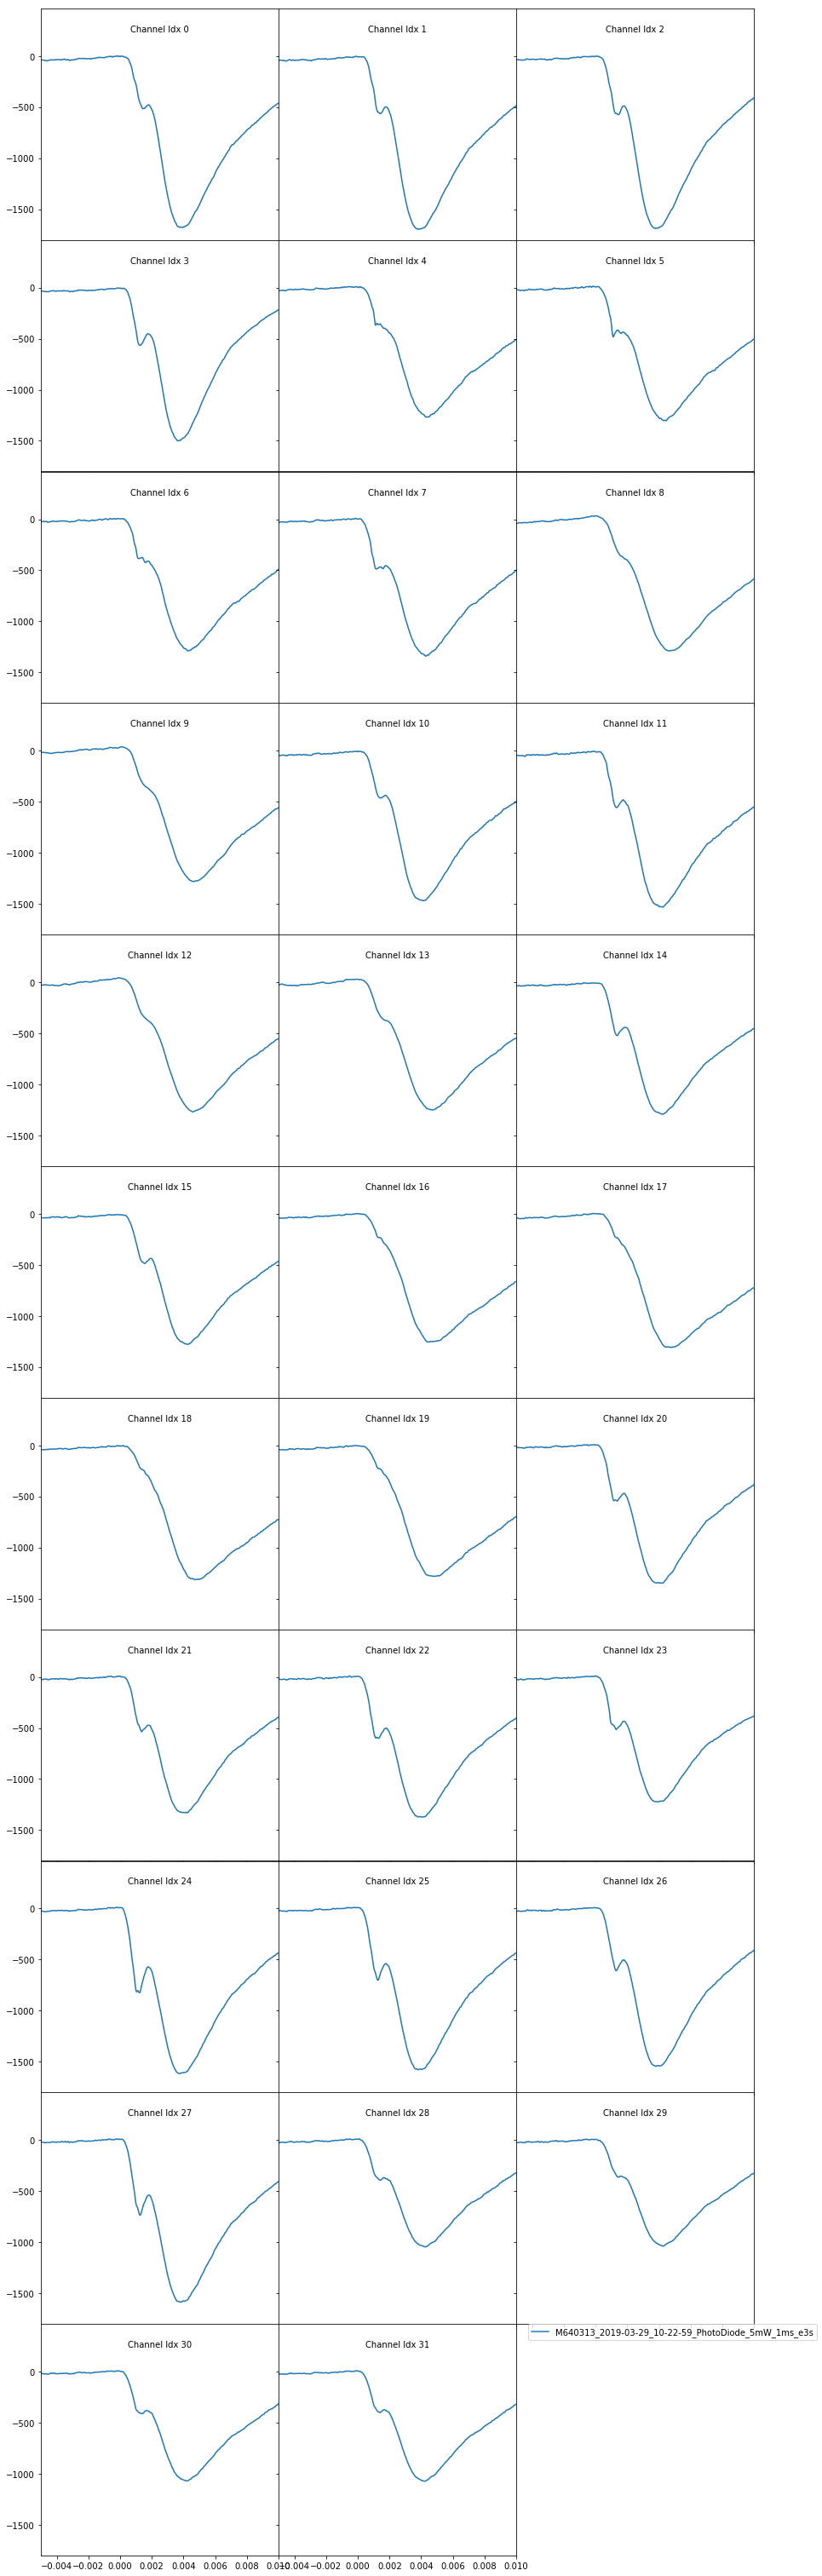

In [153]:
# For each of the channels, plot how the align data looks over experiments
channelsIdx = range(32)

fig, axs = plt.subplots(math.ceil(len(channelsIdx)/3), 3, figsize=(15, 55), facecolor='w', edgecolor='k', sharex=True, sharey=True)
fig.subplots_adjust(hspace = .001, wspace=.001)
axs = axs.ravel()

for j in range(len(channelsIdx)):
    for i in range(len(alignedData)):
        avg = np.mean(alignedData[i][j], axis = 0)
        # Save this data!!!!!!!!!!!!!
        axs[j].plot(alignedTime[i], avg, label = ExpList[i])
        axs[j].set_xlim(-0.005, 0.01)
        #axs[j].set_title("Channel Idx "+str(j))
        axs[j].text(.5,.9,"Channel Idx "+str(j), horizontalalignment='center', transform=axs[j].transAxes)
axs[j].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.delaxes(axs[j+1])
plt.show()
fig.savefig(GeneralDataDir + '000_Results/' + 'ChannelsSummary.pdf', transparent=True)

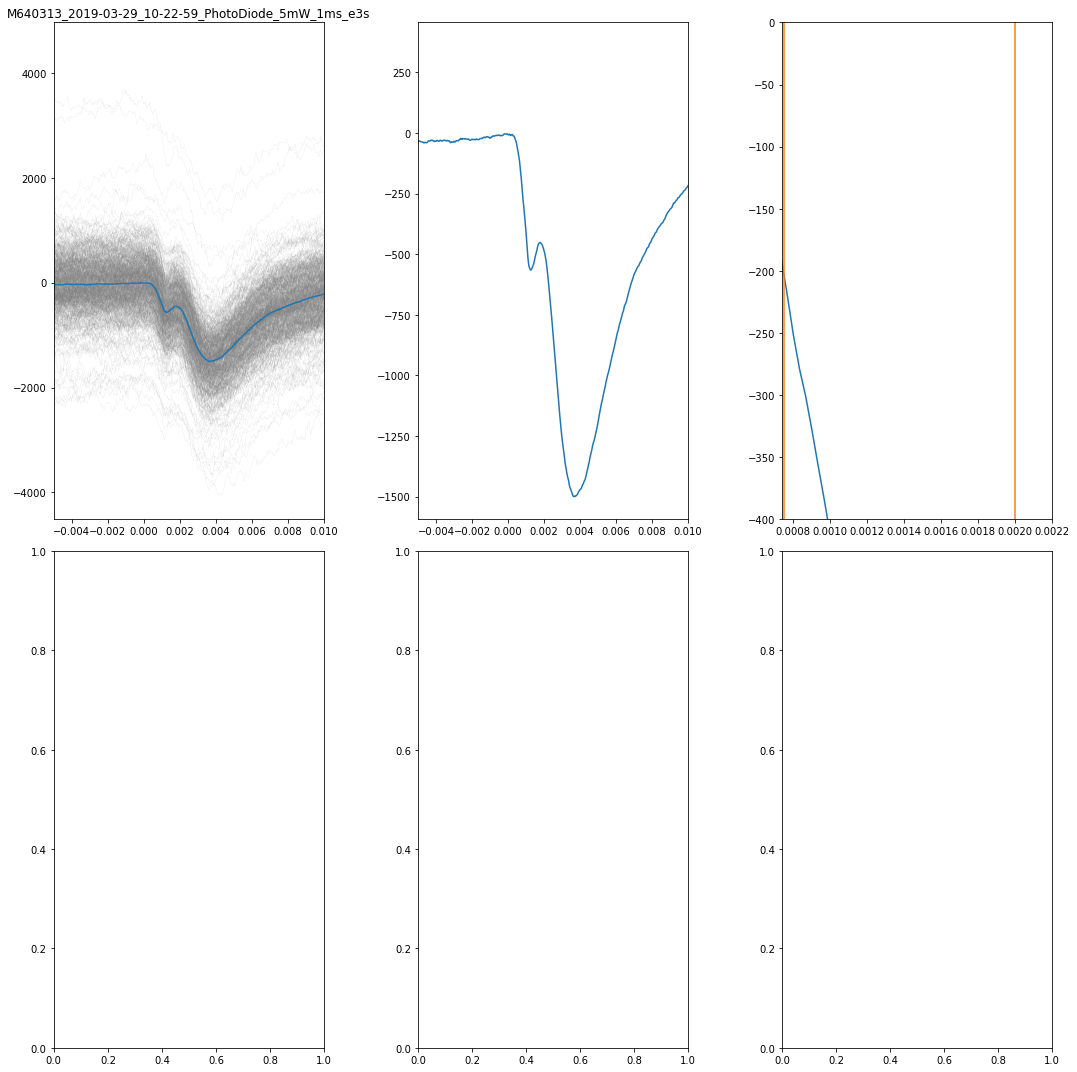

In [154]:
# Now, select an electrode, and plot it across different experiments
ElectrodeID = 3

# list to save the averages normalized
avgs_nor = [None] * len(ExpList)

fig, axs = plt.subplots(math.ceil((len(ExpList)+3)/3), 3, figsize=(15, 15), facecolor='w', edgecolor='k', sharex=False)
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for j in range(len(ExpList)):
    # get stuff
    traces_aligned = alignedData[j][ElectrodeID]
    intervalTimes = alignedTime[j]
    
    # plot
    for i in range(traces_aligned.shape[0]):
        axs[j].plot(intervalTimes, traces_aligned[i,], color = 'grey', linewidth = 0.1, alpha = 0.6)
    avg = np.mean(traces_aligned, axis = 0)
    axs[j].plot(intervalTimes, avg)
    axs[j].set_xlim(-0.005, 0.01)
    axs[j].set_title(ExpList[j])
    
    # plot the means overlaped
    axs[len(ExpList)].plot(intervalTimes, avg, label = ExpList[j])
    axs[len(ExpList)].set_xlim(-0.005, 0.01)
    
    # normalizing and saving      
    # seconds to calculate the mean:
    sToSubstract = 0.005
    # define window to normalize to the minimum
    window = [0.00075, 0.002]
    avgs_nor[j] = normalizeTrace(avg, intervalTimes, SampleRateList[j], sToSubstract, window)
    
    # plot a zoom version where the normalization will occur
    axs[len(ExpList)+1].plot(intervalTimes, avg, label = ExpList[j])
    axs[len(ExpList)+1].set_xlim(0.00074, 0.0022)
    axs[len(ExpList)+1].set_ylim(-400, 0)
    
    #lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    j+=1
axvlines(window, label = 'norm period', ax = axs[len(ExpList)+1])        
#axs[len(ExpList)].legend()
#axs[len(ExpList)+1].legend()
plt.tight_layout()
plt.show()

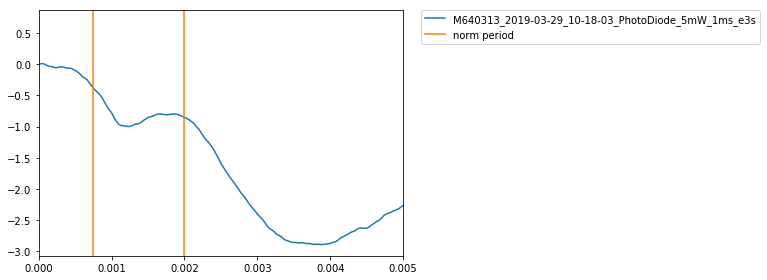

In [61]:
#plot the normalized averages overlaped
for j in range(len(avgs_nor)):
    plt.plot(alignedTime[j], avgs_nor[j], label = ExpList[j])
axvlines(window, label = 'norm period')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0.00, 0.005)
plt.tight_layout()
plt.savefig(GeneralDataDir + '000_Results/' + 'Normalized_ChannelIdx_' + str(ElectrodeID) + '.pdf', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

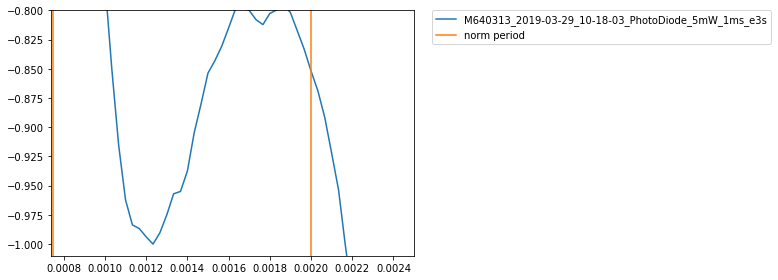

In [62]:
#plot the averages overlaped
for j in range(len(avgs_nor)):
    plt.plot(alignedTime[j], avgs_nor[j], label = ExpList[j])
axvlines(window, label = 'norm period')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0.00074, 0.0025)
plt.ylim(-1.01,-0.8)
plt.tight_layout()
plt.savefig(GeneralDataDir + '000_Results/' + 'Normalized_ChannelIdx_' + str(ElectrodeID) + '_Zoom.pdf', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [63]:
#########TEST#######

##Normalize also in the x axis as there seems to be a shift
# normalize to the minimum of the first frame. But how? subtracting or scaling? Test both

#create empty list to hold the normalized intervals
intervalTimes_norList = []
for i in range(len(avgs_nor)):
    # frames to calculate the minimum
    winFrames = np.logical_and(alignedTime[j]>window[0], alignedTime[j]<window[1])
    # find minimum (in this case it will be always -1)
    minval = min(avgs_nor[i][winFrames])
    # find frame in which the first value equal to minimum occurs. This is a crappy way of doing it!!!!!
    minindex = np.where(avgs_nor[i] == minval)[0][0]
    
    # Normalization by subtraction:
    intervalTimes_norList.append(alignedTime[j] - alignedTime[j][minindex])
    '''
    # Normalization by scaling between the minimum and the maximum:
    maxwindow = [window[1], 0.002]
    maxFrames = np.logical_and(intervalTimes>maxwindow[0], intervalTimes<maxwindow[1])
    maxval = max(avgs_nor[i][maxFrames])
    maxindex = np.where(avgs_nor[i] == maxval)[0][0]
    
    intervalTimes_norList.append(intervalTimes / (intervalTimes[maxindex] - intervalTimes[minindex]))
    '''

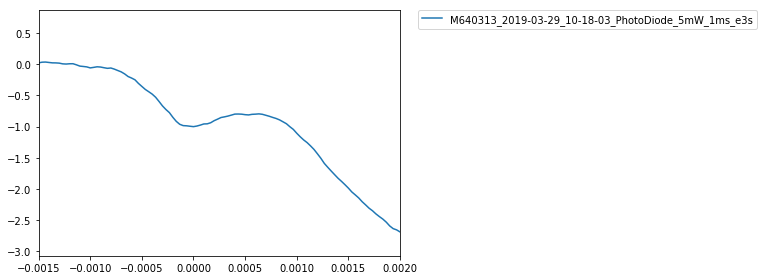

In [64]:
#plot the averages overlaped
for j in range(len(avgs_nor)):
    plt.plot(intervalTimes_norList[j], avgs_nor[j], label = ExpList[j])
#axvlines(window, label = 'norm period')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(-0.0015, 0.002)
#plt.xlim(0,20)
plt.tight_layout()
plt.savefig(GeneralDataDir + '000_Results/' + 'NormalizedTwice_ChannelIdx_' + str(ElectrodeID) + '.pdf', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

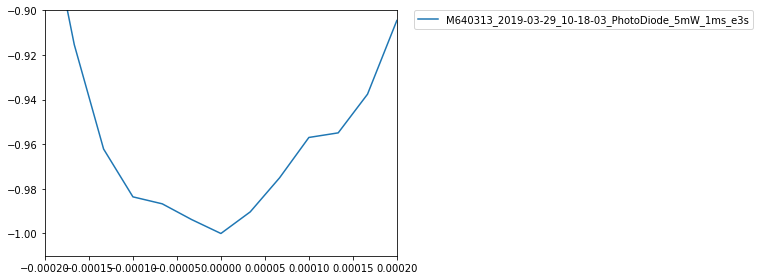

In [65]:
#plot the averages overlaped
for j in range(len(avgs_nor)):
    plt.plot(intervalTimes_norList[j], avgs_nor[j], label = ExpList[j])
#axvlines(window, label = 'norm period')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(-0.0002, 0.0002)
plt.ylim(-1.01,-0.9)
plt.tight_layout()
#plt.savefig(GeneralDataDir + '000_Results/' + 'Normalized_ChannelIdx_' + str(ElectrodeID) + '.pdf', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

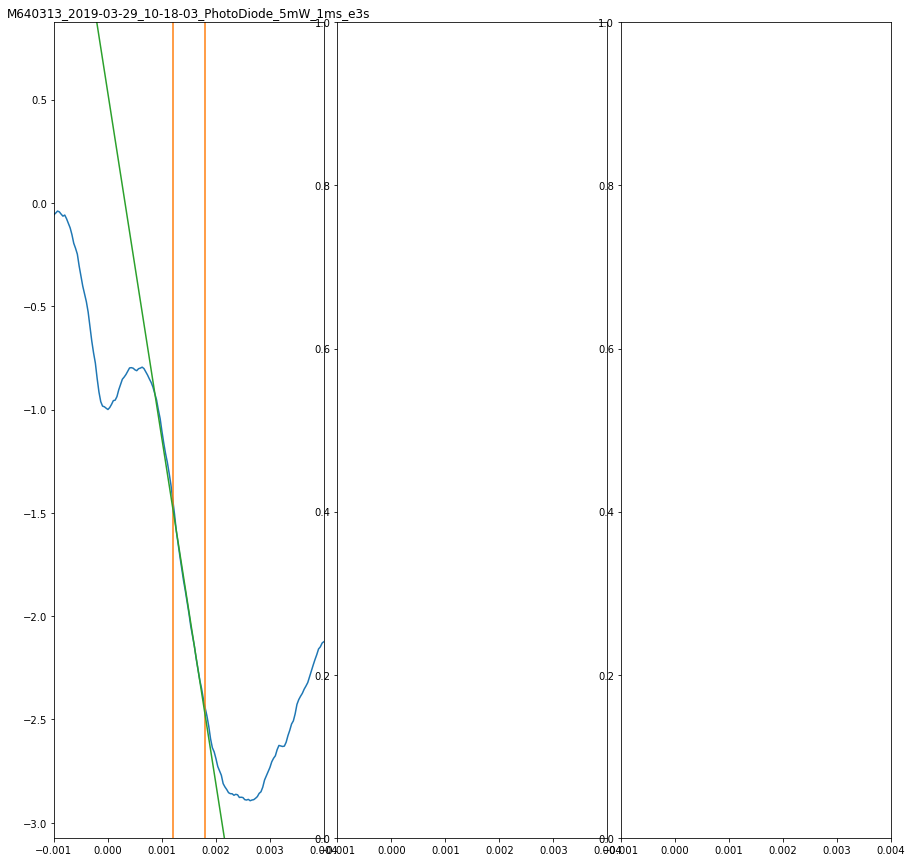

In [66]:
## Calculate the slope of the second bump

# Define the window to calculate the slope, in seconds
#slopeWin = [0.00155, 0.0022]
slopeWin = [0.0012, 0.0018]

# For each of the normalized averages, fit a linear model
linearModels = []
for j in range(len(avgs_nor)):    
    # Select frames for the normalization
    #intervalTimes = alignedTime[j]
    intervalTimes = intervalTimes_norList[j]
    slopeFrames = np.logical_and(intervalTimes>slopeWin[0], intervalTimes<slopeWin[1])
    normAvg = avgs_nor[j]
    linearModel = np.polyfit(x = intervalTimes[slopeFrames], y = normAvg[slopeFrames], deg=1)    
    linearModels.append(linearModel)


fig, axs = plt.subplots(math.ceil(len(avgs_nor)/3), 3, figsize=(15, 15), facecolor='w', edgecolor='k', sharex=True, sharey=False)
fig.subplots_adjust(hspace = .1, wspace=.05)
axs = axs.ravel()

for i in range(len(avgs_nor)):
    #intervalTimes = alignedTime[j]
    intervalTimes = intervalTimes_norList[i]

    axs[i].plot(intervalTimes, avgs_nor[i], label = ExpList[i])  
    axvlines(slopeWin, label = 'slope window', ax = axs[i])
    axs[i].set_xlim(-0.001, 0.004)
    ymin, ymax = axs[i].get_ylim()   
    # plot linear model:
    p = np.poly1d(linearModels[i])
    axs[i].plot(intervalTimes, p(intervalTimes), label = 'Linear Fit')
    axs[i].set_title(ExpList[i])
    axs[i].set_ylim(ymin, ymax)
    
plt.show()

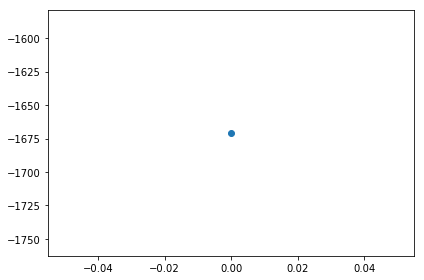

In [67]:
# make a new plot with the slopes
# in the x axis the differences between the times of measurements, in days
ExpListDates = parseTitlesForDates(ExpList)
expTimeDifferences = timeDifferences(ExpListDates)
plt.plot(expTimeDifferences, [item[0] for item in linearModels], '-o')
plt.tight_layout()
plt.savefig(GeneralDataDir + '000_Results/' + 'SlopeProgression_' + str(ElectrodeID) + '.pdf', transparent=True, bbox_inches='tight')
plt.show()

In [197]:
# If needed plot also the data in relation to the trials done and not to the time passed

In [9]:
ExpList = ['M640313_2019-03-29_10-22-59_PhotoDiode_5mW_1ms_e3s']

In [10]:
# Test effects during one session
# print the duration of each experiment
for j in range(len(ExpList)):
    print(ExpList[j]+' length is '+str(DurationList[j])+' and has a ID of '+str(j))

M640313_2019-03-29_10-22-59_PhotoDiode_5mW_1ms_e3s length is 1686.5365 1/Hz and has a ID of 0


In [11]:
# get stuff
ExpID = 0
ElectrodeID = 3

traces_aligned = alignedData[ExpID][ElectrodeID]
intervalTimes = alignedTime[ExpID]

In [12]:
#OPTIONAL! If the data has laser readings, normalize by it!
LaserIdx = 35
intervalWindow = [0,0.001]
Laser_aligned = alignTrace(signals.signal, signals.times, firstpulses, intervalWindow, recording.sample_rate)[LaserIdx]
Laser_means = np.median(Laser_aligned, axis = 1)

for i in range(len(traces_aligned)):
    traces_aligned[i] = traces_aligned[i]/Laser_means[i]

In [19]:
# split into X equal sets
NofSets = 20
NofTraces = traces_aligned.shape[0]
modulus = NofTraces % NofSets
SplitDataset = np.split(traces_aligned[0:(NofTraces-modulus)], NofSets, axis=0) #it needs to be divisible (last traces removed if needed)

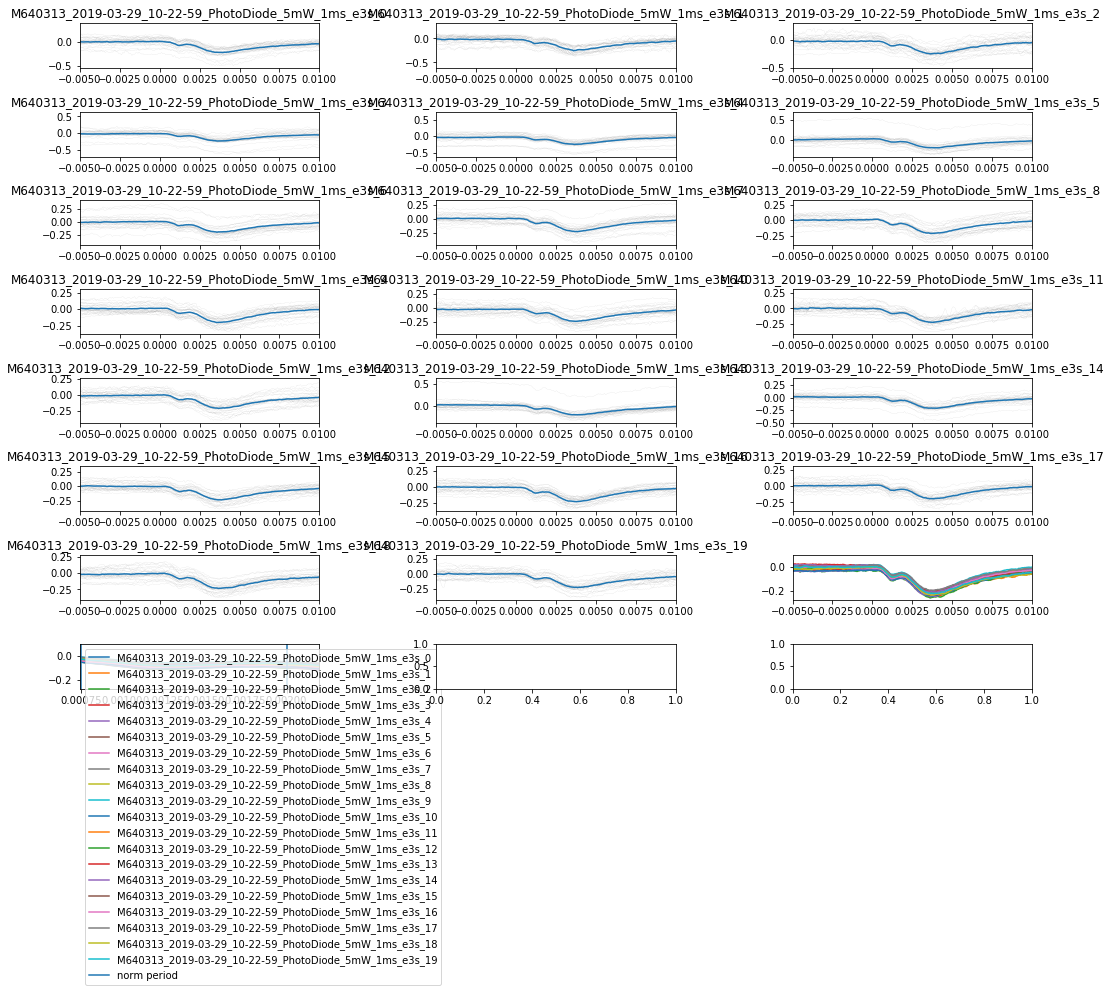

In [20]:
# plot

# list to save the averages normalized
avgs_nor = [None] * len(SplitDataset)

fig, axs = plt.subplots(math.ceil((len(SplitDataset)+3)/3), 3, figsize=(15, 10), facecolor='w', edgecolor='k', sharex=False)
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for j in range(len(SplitDataset)):
    # get stuff
    traces_aligned = SplitDataset[j]
    
    # plot
    for i in range(traces_aligned.shape[0]):
        axs[j].plot(intervalTimes, traces_aligned[i,], color = 'grey', linewidth = 0.1, alpha = 0.6)
    avg = np.mean(traces_aligned, axis = 0)
    axs[j].plot(intervalTimes, avg)
    axs[j].set_xlim(-0.005, 0.01)
    #axs[j].set_ylim(-2000, 1000)
    axs[j].set_title(ExpList[ExpID]+'_'+str(j))
    
    # plot the means overlaped
    axs[len(SplitDataset)].plot(intervalTimes, avg, label = ExpList[ExpID]+'_'+str(j))
    axs[len(SplitDataset)].set_xlim(-0.005, 0.01)
    
    # normalizing and saving      
    # seconds to calculate the mean:
    sToSubstract = 0.005
    # define window to normalize to the minimum
    window = [0.00075, 0.002]
    avgs_nor[j] = normalizeTrace(avg, intervalTimes, SampleRateList[ExpID], sToSubstract, window)
    
    # plot a zoom version where the normalization will occur
    axs[len(SplitDataset)+1].plot(intervalTimes, avg, label = ExpList[ExpID]+'_'+str(j))
    axs[len(SplitDataset)+1].set_xlim(0.00074, 0.0022)
    #axs[len(SplitDataset)+1].set_ylim(-600, 0)
    
    #lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    j+=1
axvlines(window, label = 'norm period', ax = axs[len(SplitDataset)+1])        
#axs[len(ExpList)].legend()
axs[len(SplitDataset)+1].legend()
plt.tight_layout()
plt.show()

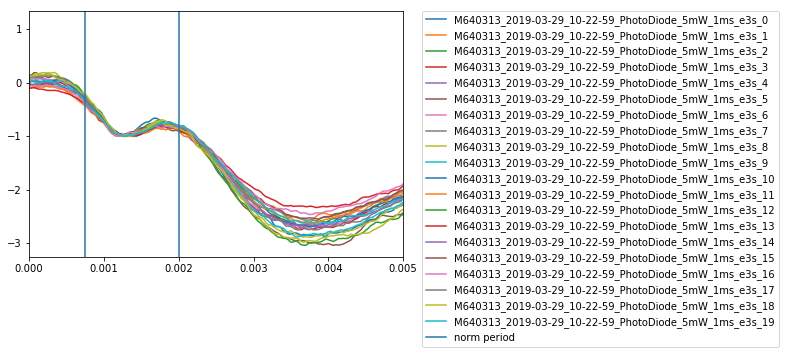

In [220]:
#plot the normalized averages overlaped
for j in range(len(avgs_nor)):
    plt.plot(intervalTimes, avgs_nor[j], label = ExpList[ExpID]+'_'+str(j))
axvlines(window, label = 'norm period')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0.00, 0.005)
plt.tight_layout()
#plt.savefig(GeneralDataDir + '000_Results/' + 'Normalized_ChannelIdx_' + str(ElectrodeID) + '.pdf', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

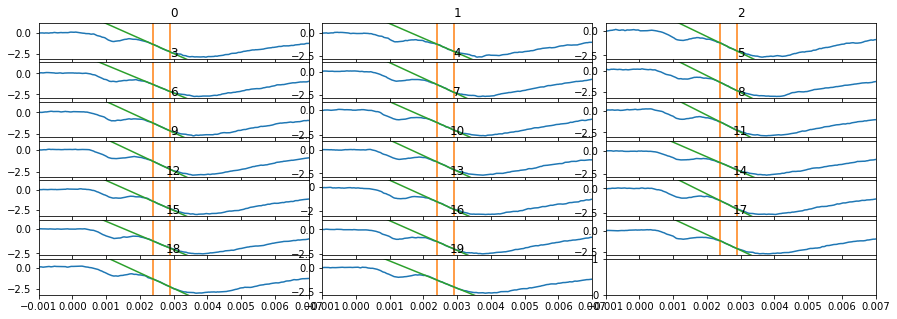

In [221]:
## Calculate the slope of the second bump

# Define the window to calculate the slope, in seconds
#slopeWin = [0.00155, 0.0022]
slopeWin = [0.0024, 0.0029]

# For each of the normalized averages, fit a linear model
linearModels = []
for j in range(len(avgs_nor)):    
    slopeFrames = np.logical_and(intervalTimes>slopeWin[0], intervalTimes<slopeWin[1])
    normAvg = avgs_nor[j]
    linearModel = np.polyfit(x = intervalTimes[slopeFrames], y = normAvg[slopeFrames], deg=1)    
    linearModels.append(linearModel)


fig, axs = plt.subplots(math.ceil(len(avgs_nor)/3), 3, figsize=(15, 5), facecolor='w', edgecolor='k', sharex=True, sharey=False)
fig.subplots_adjust(hspace = .1, wspace=.05)
axs = axs.ravel()

for i in range(len(avgs_nor)):
    axs[i].plot(intervalTimes, avgs_nor[i], label = ExpList[ExpID]+'_'+str(i))  
    axvlines(slopeWin, label = 'slope window', ax = axs[i])
    axs[i].set_xlim(-0.001, 0.007)
    ymin, ymax = axs[i].get_ylim()   
    # plot linear model:
    p = np.poly1d(linearModels[i])
    axs[i].plot(intervalTimes, p(intervalTimes), label = 'Linear Fit')
    axs[i].set_title(i)
    axs[i].set_ylim(ymin, ymax)
    
plt.show()

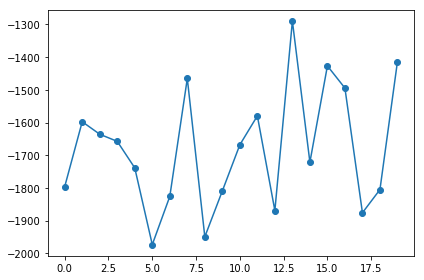

In [222]:
# make a new plot with the slopes
plt.plot(np.arange(len(linearModels)), [item[0] for item in linearModels], '-o')
plt.tight_layout()
plt.savefig(GeneralDataDir + '000_Results/' + 'LaserMax_SlopeProgression_' + str(ElectrodeID) + '.pdf', transparent=True, bbox_inches='tight')
plt.show()

26

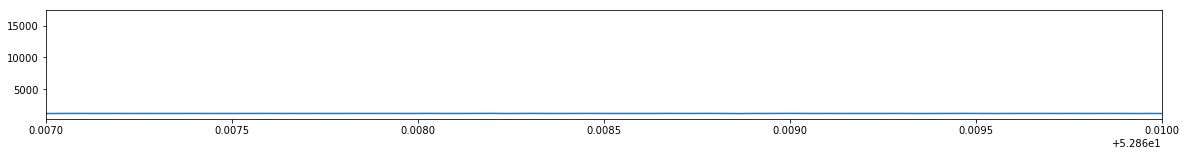

In [182]:
# If data for the power of the laser has been taken, it can be used to normalize
LaserIdx = 35
fig_an, ax_an = plt.subplots(figsize=(20, 2))
ax_an.plot(signals.times, signals.signal[LaserIdx])
axvlines(events.times, alpha=0.4)
plt.xlim(52.867, 52.87)
#plt.ylim(-2000, 1000)
plt.show()

In [13]:
# Calculate the mean signal in between
# function to align to the first pulses
intervalWindow = [0,0.001]
Laser_aligned = alignTrace(signals.signal, signals.times, firstpulses, intervalWindow, recording.sample_rate)[LaserIdx]

Laser_means = np.median(Laser_aligned, axis = 1)

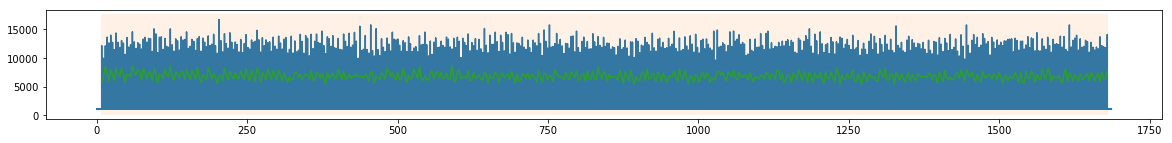

In [14]:
fig_an, ax_an = plt.subplots(figsize=(20, 2))
ax_an.plot(signals.times, signals.signal[LaserIdx])
axvlines(events.times, alpha=0.1)
ax_an.plot(firstpulses, Laser_means)
#plt.xlim(52.867, 52.87)
#plt.ylim(-2000, 1000)
plt.show()

In [69]:
# Test: normalize the traces to 0 before averaging:  [THIS DOES NOT MAKE ANY DIFFERENCE]
ExpID = 4
ElectrodeID = 3
traces_aligned = alignedData[ExpID][ElectrodeID]
intervalTimes = alignedTime[ExpID]

traces_aligned_normalized = np.zeros(traces_aligned.shape)
# Normalize
for i in range(traces_aligned.shape[0]): 
    trace = traces_aligned[i,]
    subFrames = int(math.floor(0.005 * SampleRateList[ExpID].base))
    traces_aligned_normalized[i,] = trace - np.mean(trace[intervalTimes<0][-subFrames:])
    
# split into X equal sets
NofSets = 6
NofTraces = traces_aligned_normalized.shape[0]
modulus = NofTraces % NofSets
SplitDataset = np.split(traces_aligned_normalized[0:(NofTraces-modulus)], NofSets, axis=0) #it needs to be divisible (last traces removed if needed)


IndexError: list index out of range

In [ ]:
# plot

# list to save the averages normalized
avgs_nor = [None] * len(SplitDataset)

fig, axs = plt.subplots(math.ceil((len(SplitDataset)+3)/3), 3, figsize=(15, 10), facecolor='w', edgecolor='k', sharex=False)
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for j in range(len(SplitDataset)):
    # get stuff
    traces_aligned = SplitDataset[j]
    
    # plot
    for i in range(traces_aligned.shape[0]):
        axs[j].plot(intervalTimes, traces_aligned[i,], color = 'grey', linewidth = 0.1, alpha = 0.6)
    avg = np.mean(traces_aligned, axis = 0)
    axs[j].plot(intervalTimes, avg)
    axs[j].set_xlim(-0.005, 0.01)
    axs[j].set_ylim(-2000, 1000)
    axs[j].set_title(ExpList[ExpID]+'_'+str(j))
    
    # plot the means overlaped
    axs[len(SplitDataset)].plot(intervalTimes, avg, label = ExpList[ExpID]+'_'+str(j))
    axs[len(SplitDataset)].set_xlim(-0.005, 0.01)
    
    # normalizing and saving      
    # seconds to calculate the mean:
    sToSubstract = 0.005
    # define window to normalize to the minimum
    window = [0.00075, 0.002]
    avgs_nor[j] = normalizeTrace(avg, intervalTimes, SampleRateList[ExpID], sToSubstract, window)
    
    # plot a zoom version where the normalization will occur
    axs[len(SplitDataset)+1].plot(intervalTimes, avg, label = ExpList[ExpID]+'_'+str(j))
    axs[len(SplitDataset)+1].set_xlim(0.00074, 0.0022)
    axs[len(SplitDataset)+1].set_ylim(-600, 0)
    
    #lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    j+=1
axvlines(window, label = 'norm period', ax = axs[len(SplitDataset)+1])        
#axs[len(ExpList)].legend()
axs[len(SplitDataset)+1].legend()
plt.tight_layout()
plt.show()

In [ ]:
linearModels
